In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [415]:
file_path = "data.csv"
df = pd.read_csv(file_path)

In [416]:
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [417]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 181915
Number of columns: 12


In [418]:
#  duplicate rows
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplcates:", df.shape[0])

Number of rows after removing duplcates: 181915


COUNTRY                object
CODE_TIME              object
TIME                   object
YEAR                    int64
MONTH                   int64
MONTH_NAME             object
PRODUCT                object
VALUE                 float64
DISPLAY_ORDER           int64
yearToDate            float64
previousYearToDate    float64
share                 float64
dtype: object


In [420]:
# Remove  columns
columns_to_remove = ['CODE_TIME','TIME','MONTH_NAME','share']
df.drop(columns_to_remove, axis=1, inplace=True)
print("Number of columns:", df.shape[1])
df.head()

Number of columns: 8


,COUNTRY,YEAR,MONTH,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate
0,Australia,2010,1,Hydro,990.728,1,16471.891,NaN
1,Australia,2010,1,Wind,409.469,2,4940.909,NaN
2,Australia,2010,1,Solar,49.216,3,908.238,NaN
3,Australia,2010,1,Geothermal,0.083,4,0.996,NaN
4,Australia,2010,1,Total combustible fuels,19289.730,7,214302.969,NaN


In [421]:
df = df.drop(df[df['YEAR'] == 2010 ].index)
df.head()

,COUNTRY,YEAR,MONTH,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate
11583,Australia,2011,1,Hydro,1171.131,1,13997.977,990.728
11584,Australia,2011,1,Wind,433.348,2,6787.749,409.469
11585,Australia,2011,1,Solar,176.116,3,1875.002,49.216
11586,Australia,2011,1,Geothermal,0.083,4,0.996,0.083
11587,Australia,2011,1,Total combustible fuels,21700.353,7,216322.159,19289.730


In [422]:
print("before editing:", df.shape[0])
df.replace("Null", np.nan, inplace=True)
df.replace("NA", np.nan, inplace=True)
df.replace("None", np.nan, inplace=True)
df.replace("NULL", np.nan, inplace=True)
print("Number of rows after removing missing values:", df.shape[0])

before editing: 170332
Number of rows after removing missing values: 170332


In [423]:
# missing 
missing_data = df.isna().any(axis=1)
dropped_rows = df[missing_data]
print(dropped_rows.head())
df.dropna(inplace=True)
print("Number of rows after removing missing values:", df.shape[0])

      COUNTRY  YEAR  MONTH     PRODUCT  VALUE  DISPLAY_ORDER  yearToDate  \
11792  France  2011      1  Geothermal  4.672              4      56.064   
12757  France  2011      2  Geothermal  4.672              4      56.064   
13723  France  2011      3  Geothermal  4.672              4      56.064   
14688  France  2011      4  Geothermal  4.672              4      56.064   
15653  France  2011      5  Geothermal  4.672              4      56.064   

       previousYearToDate  
11792                 NaN  
12757                 NaN  
13723                 NaN  
14688                 NaN  
15653                 NaN  
Number of rows after removing missing values: 164810


In [424]:
# Save cleaned data to a new file
# cleaned_file_path = "cleaned_data.csv"
# df.to_csv(cleaned_file_path, index=False)

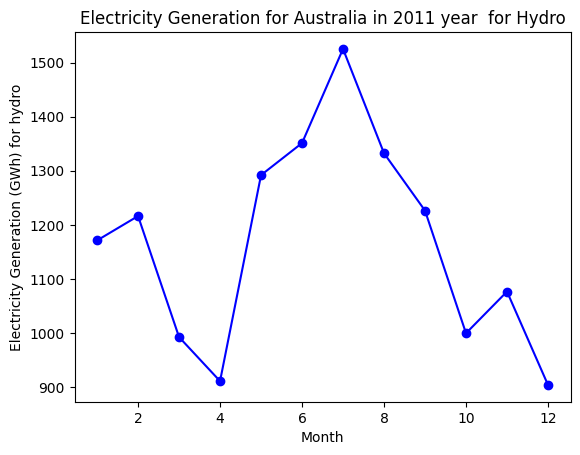

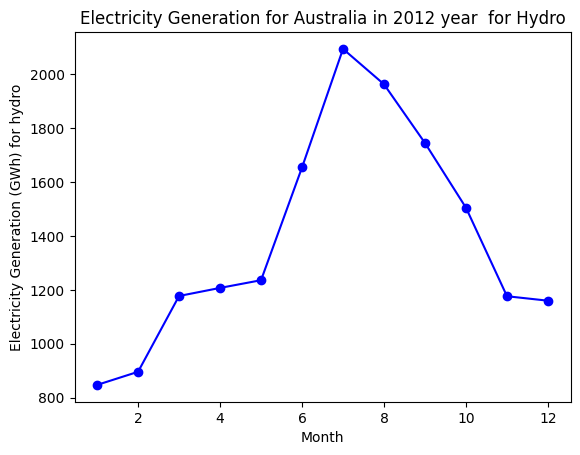

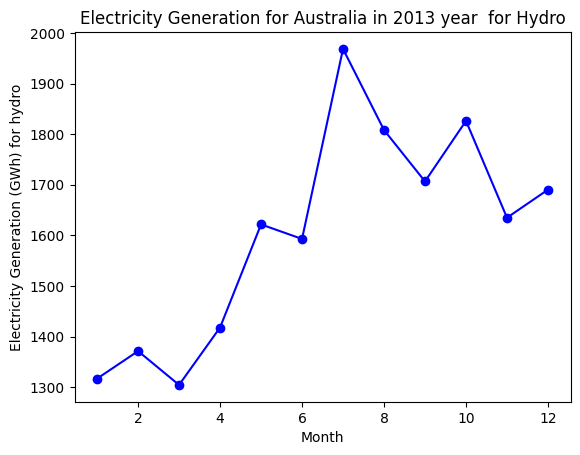

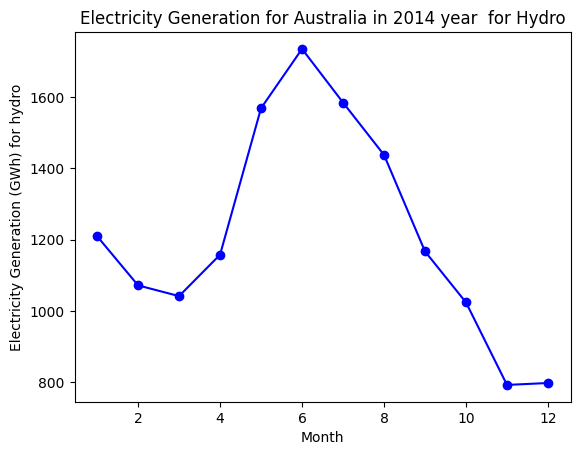

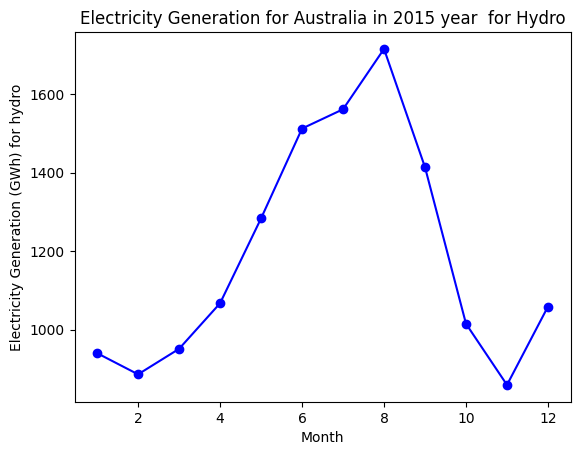

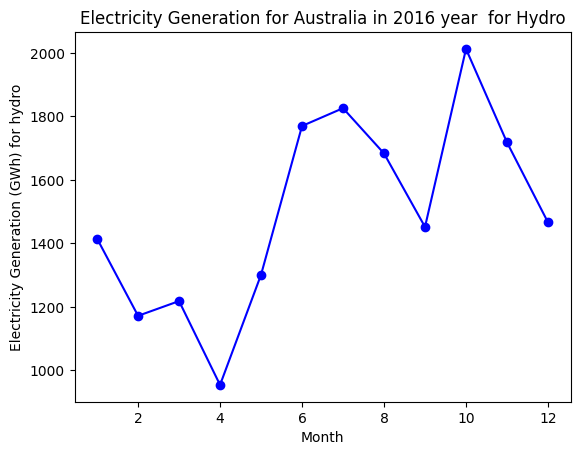

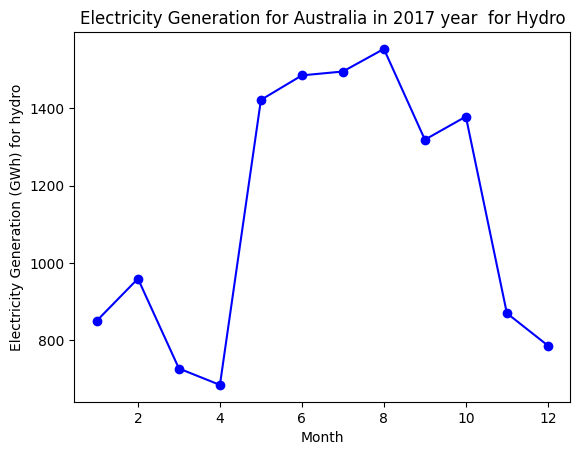

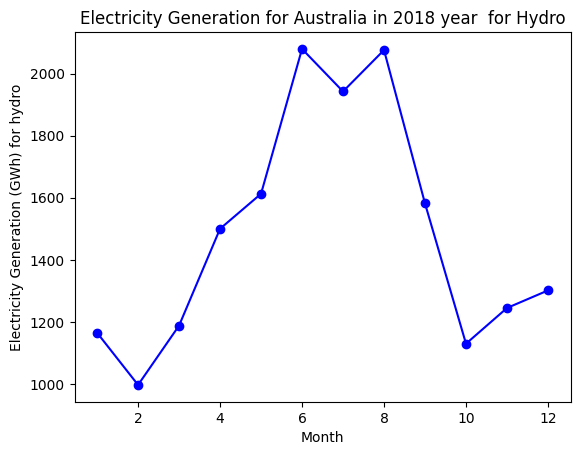

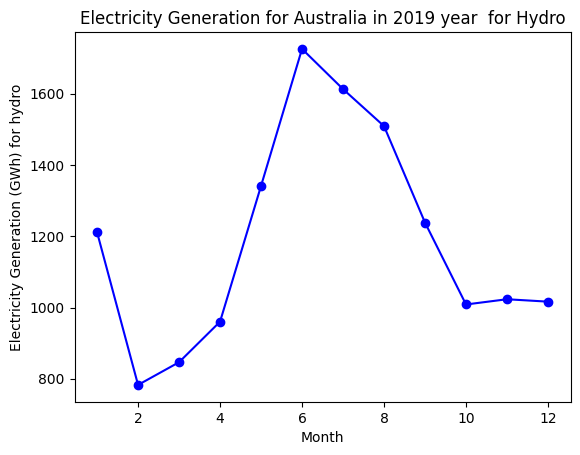

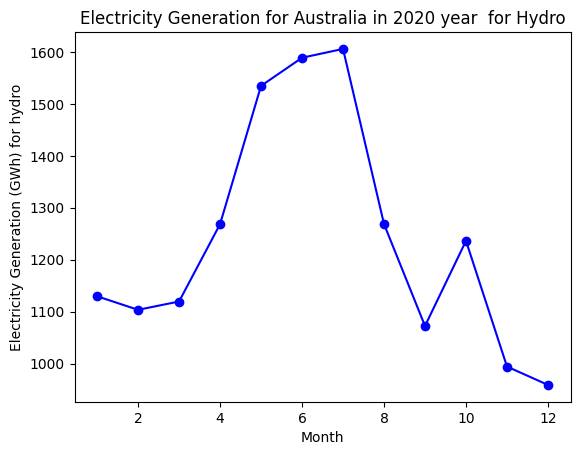

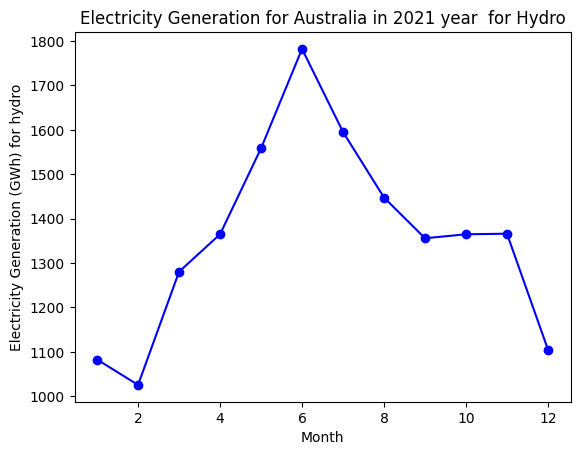

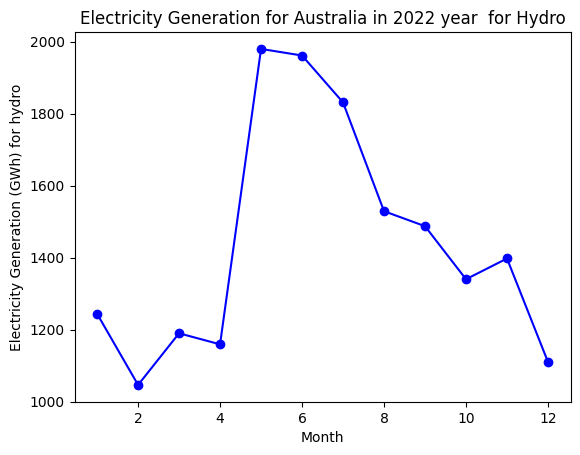

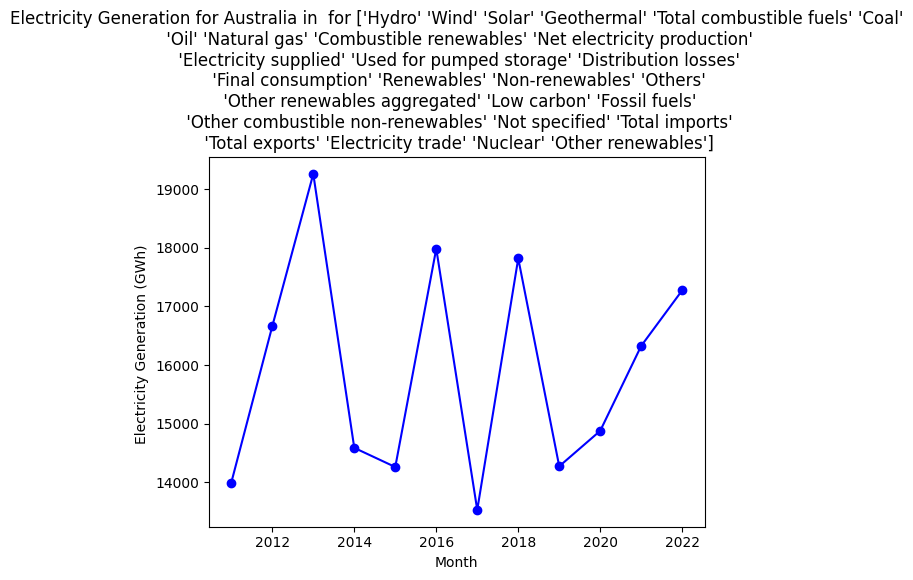

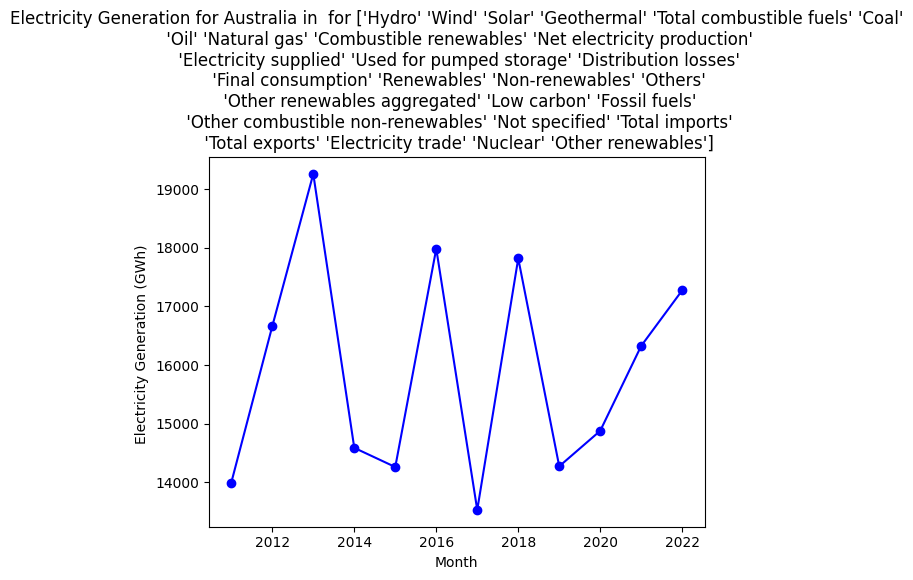

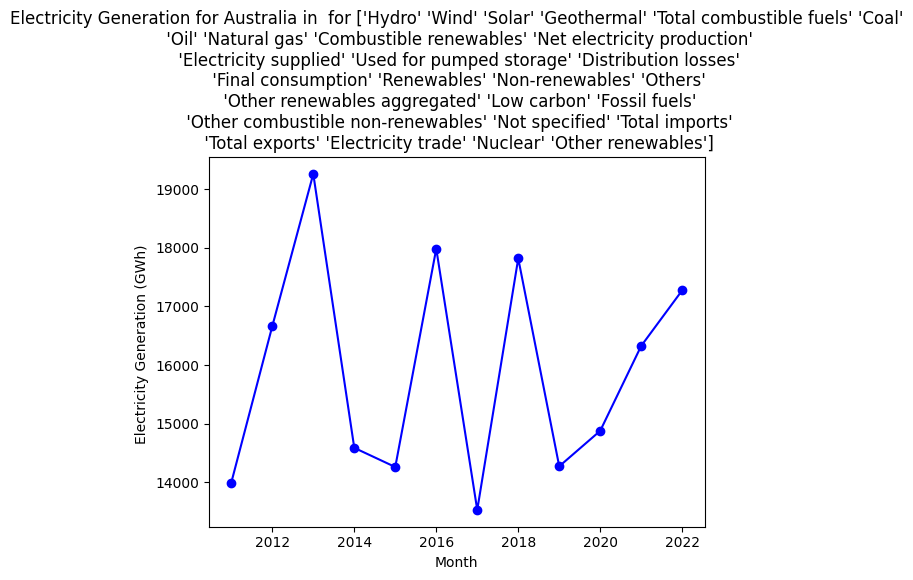

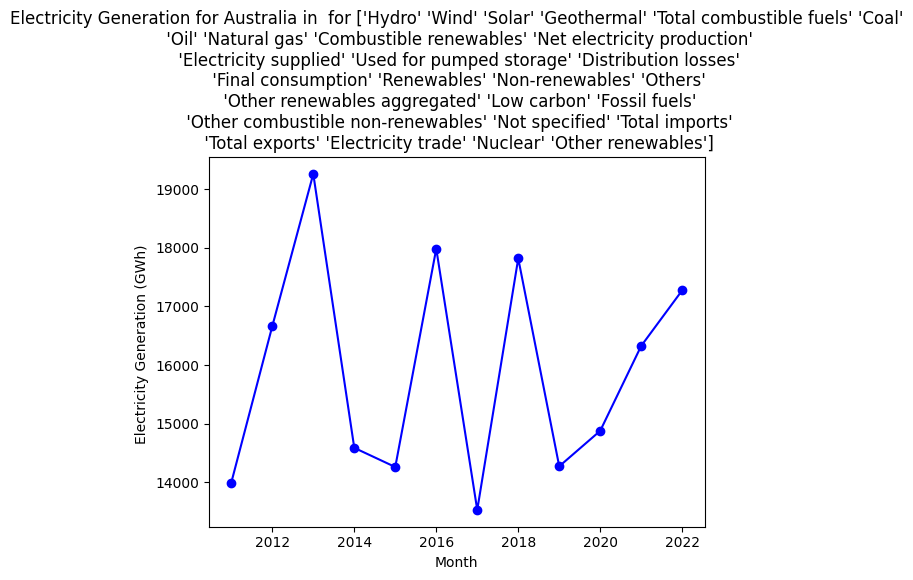

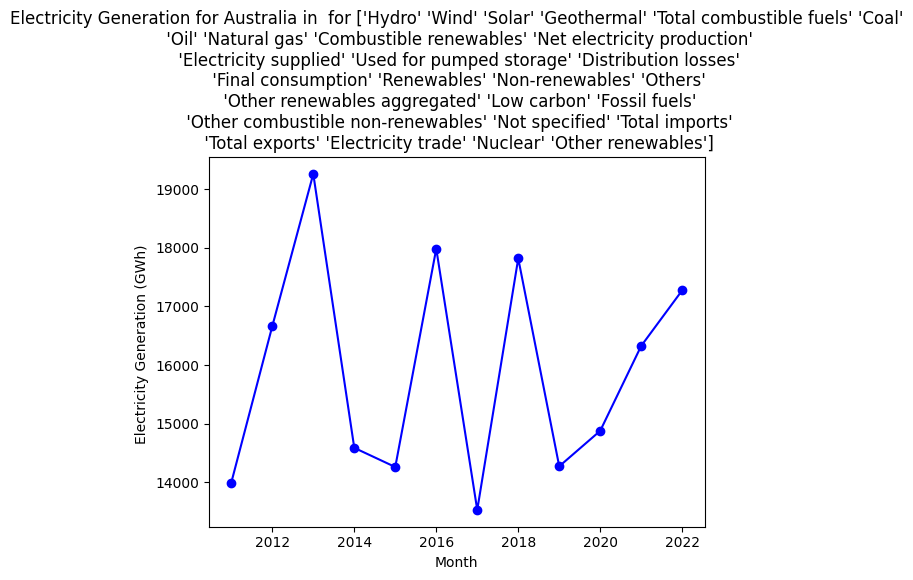

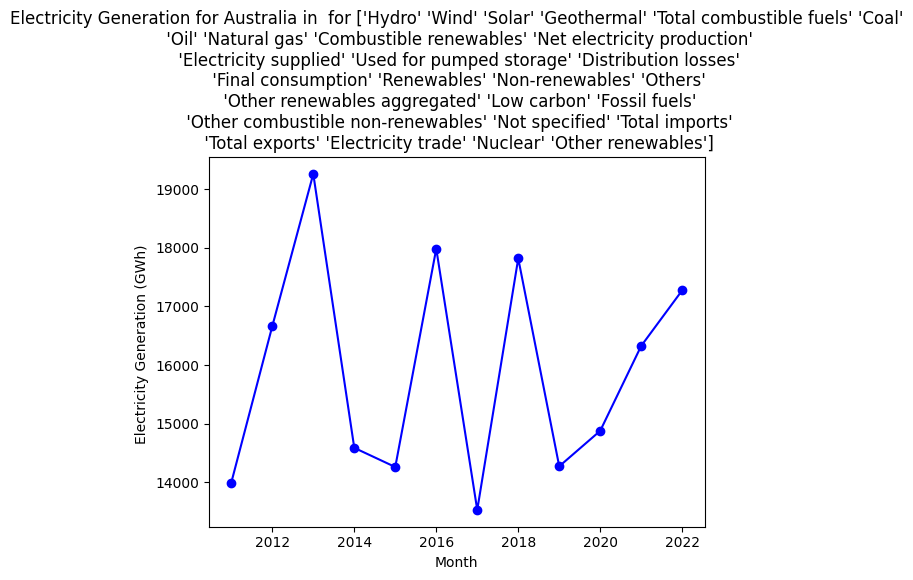

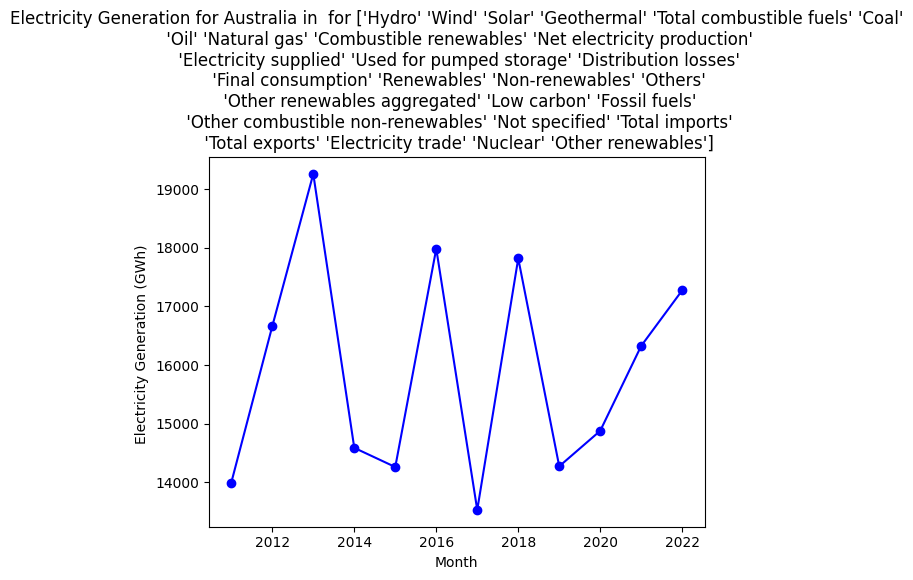

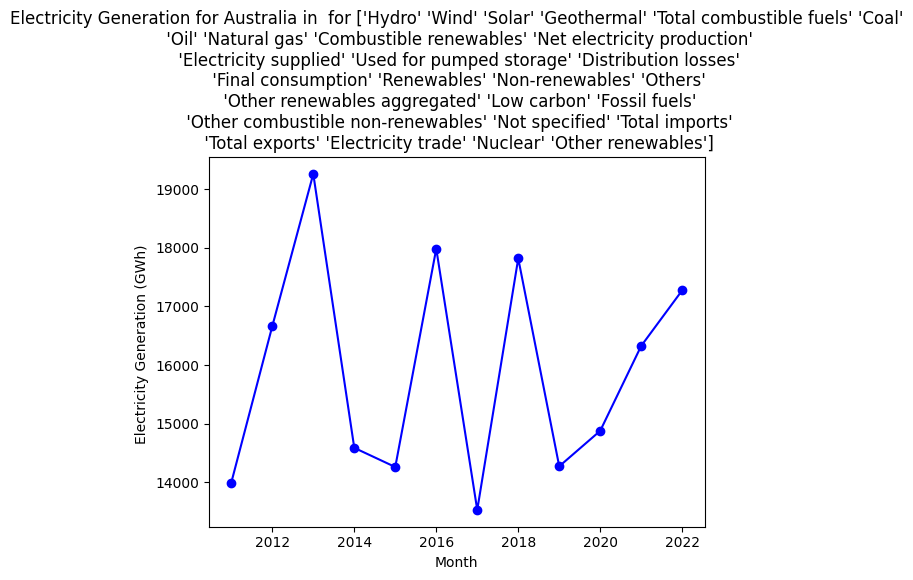

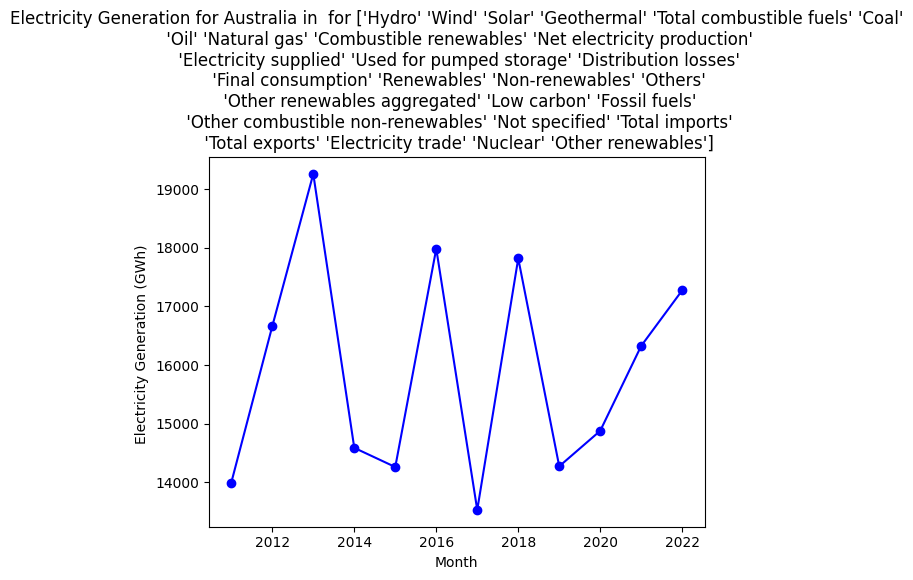

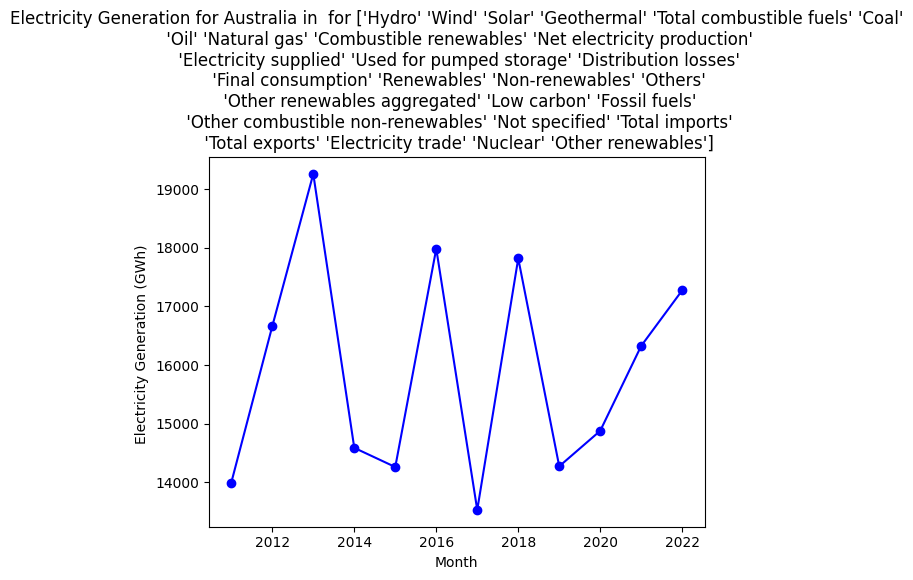

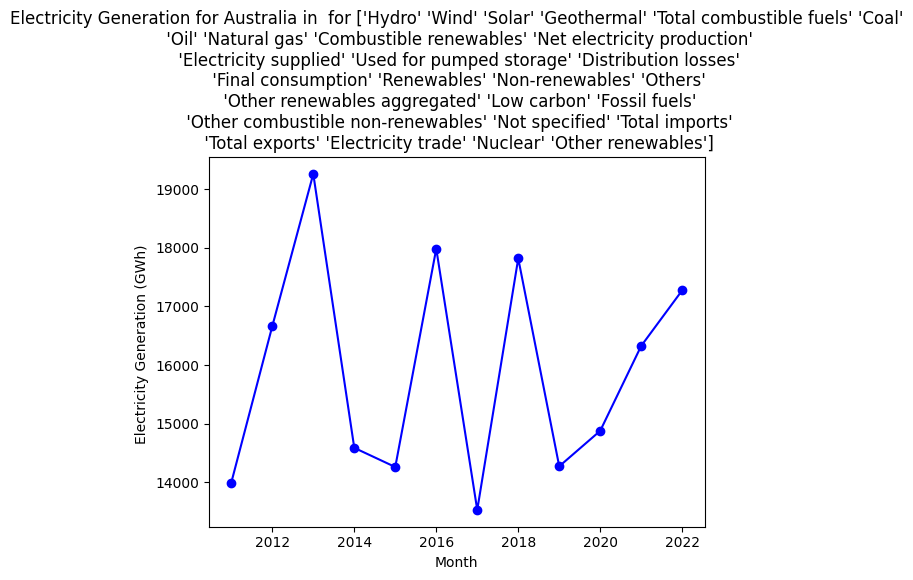

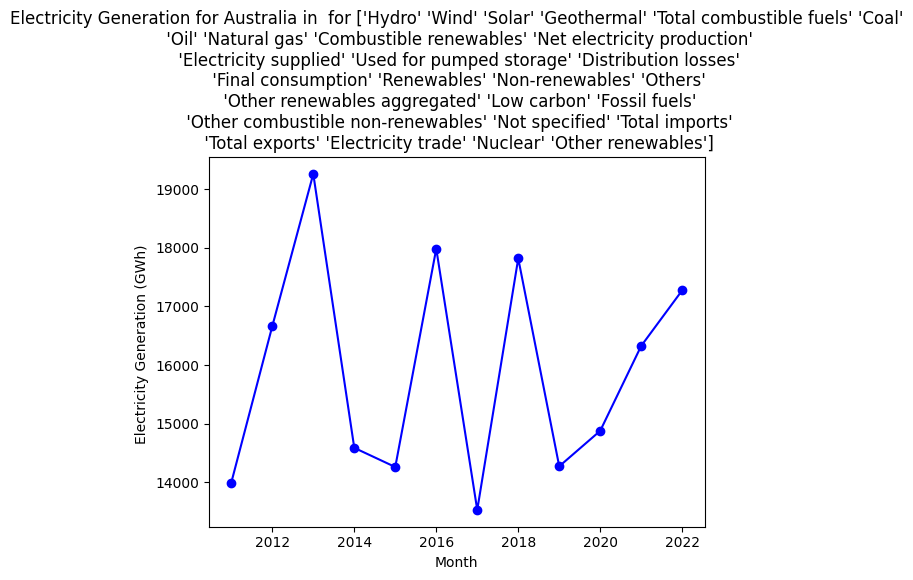

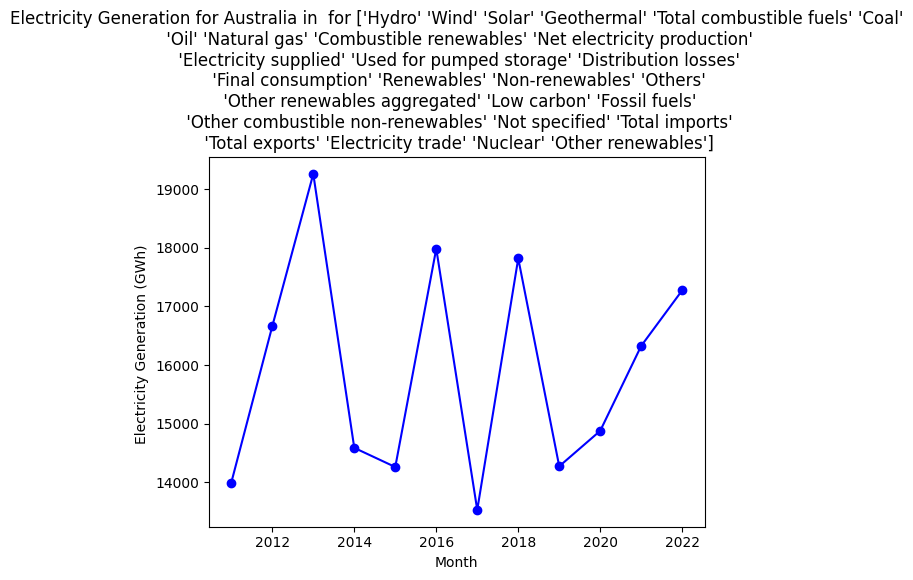

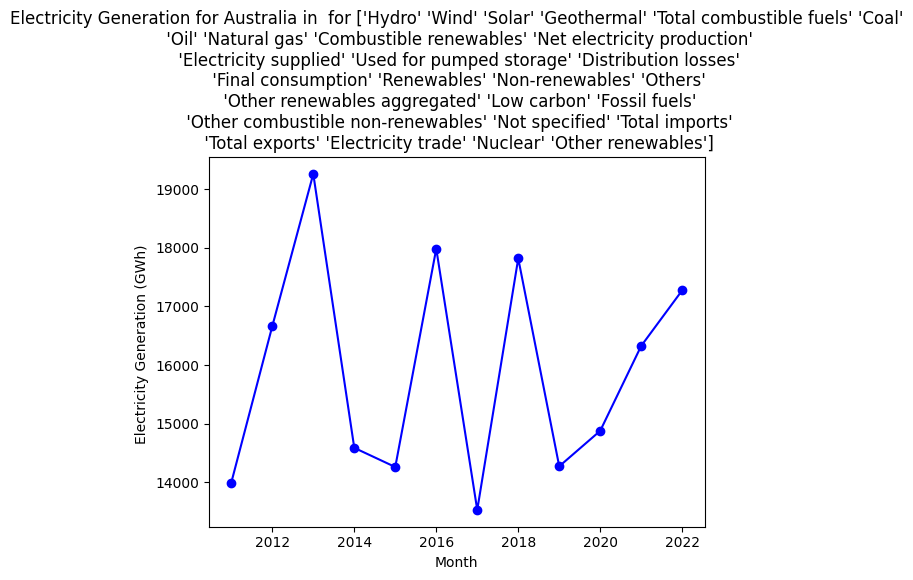

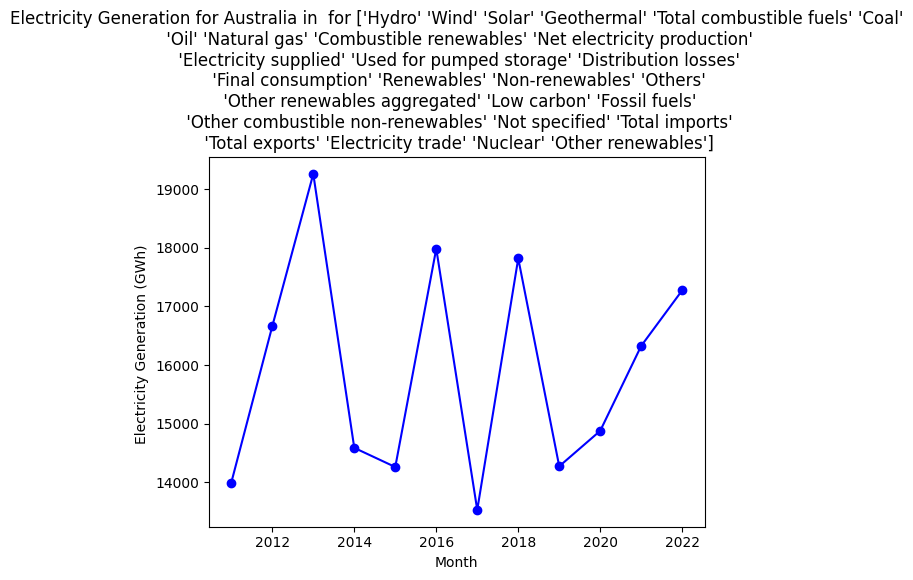

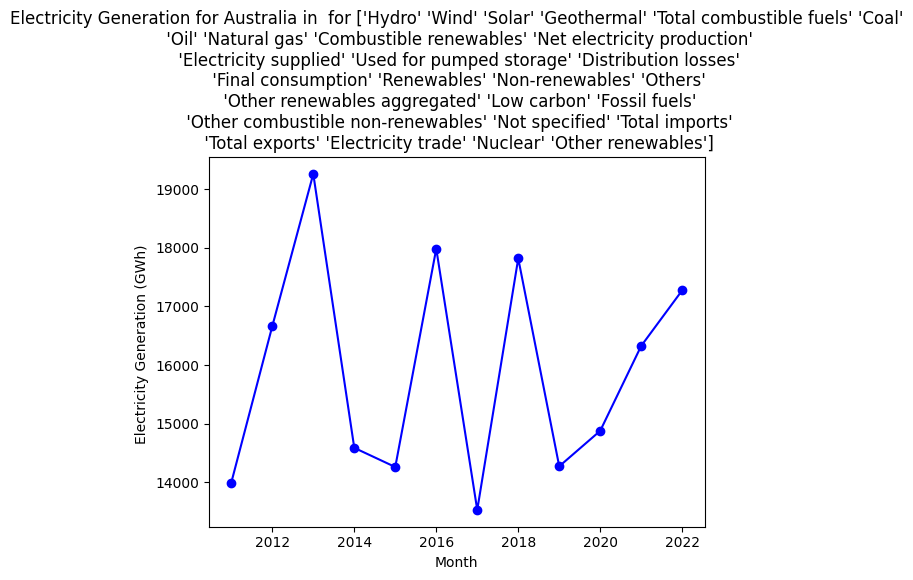

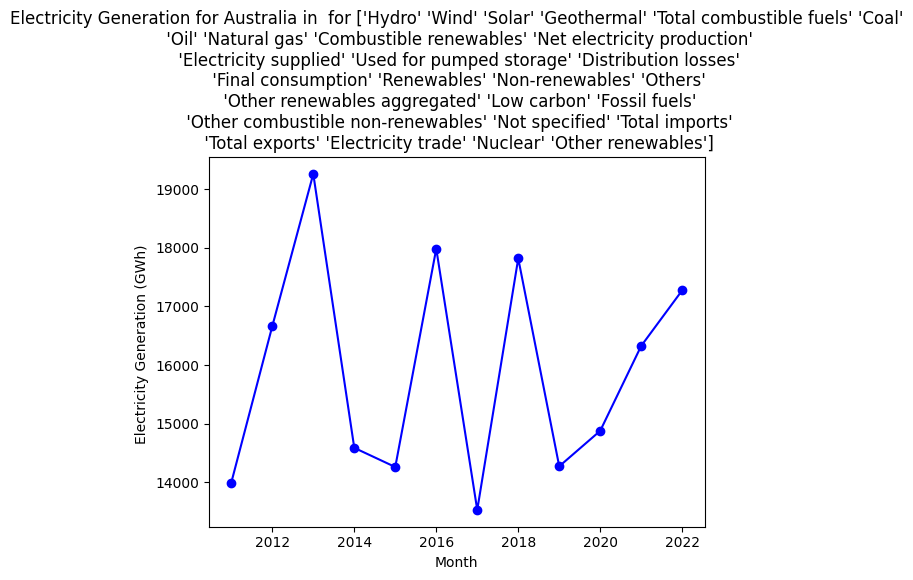

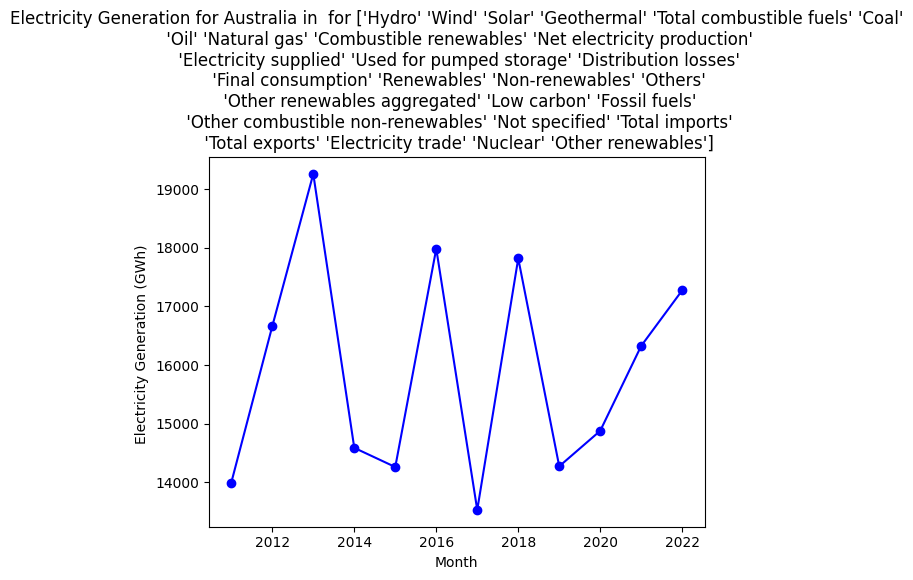

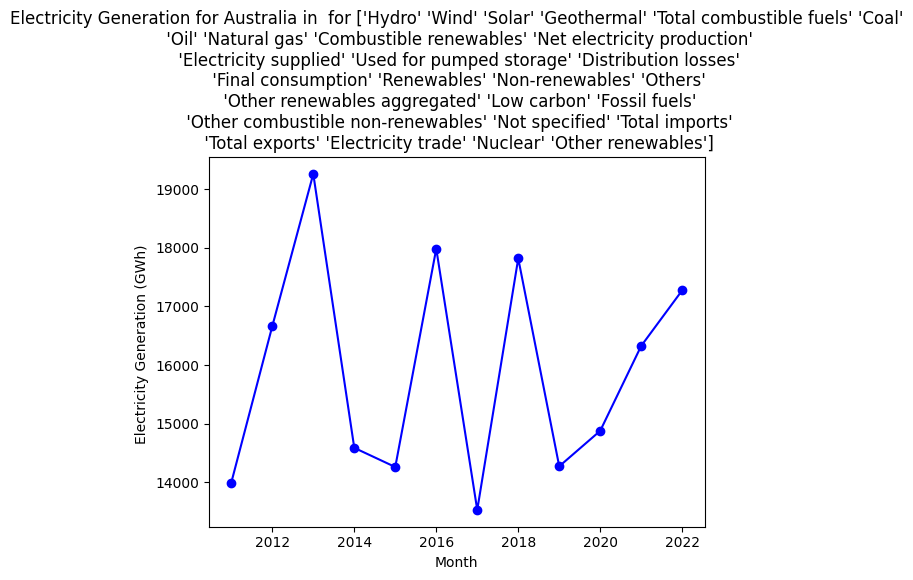

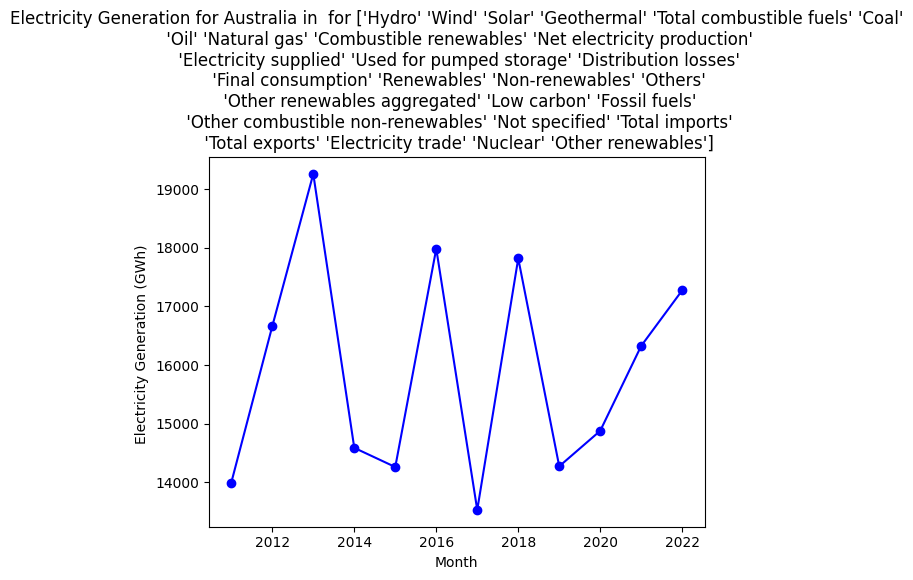

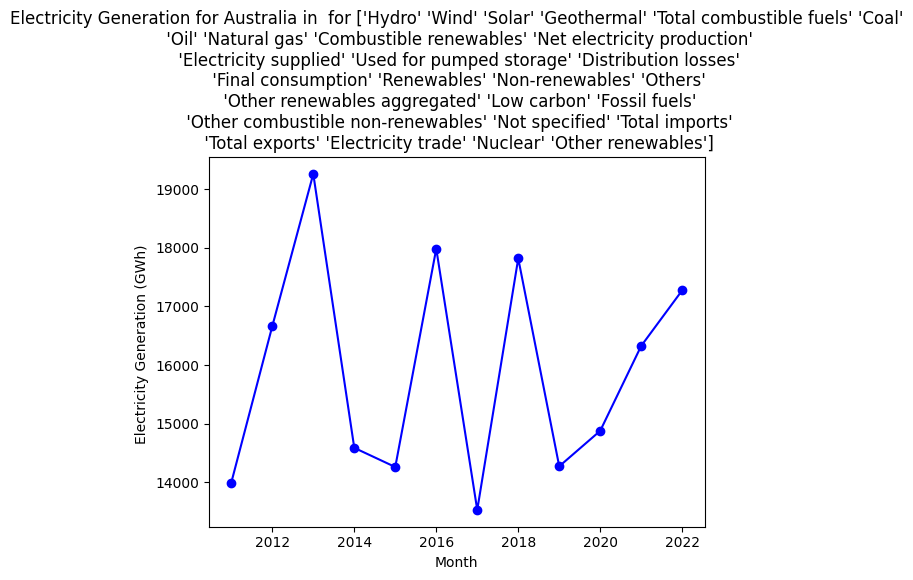

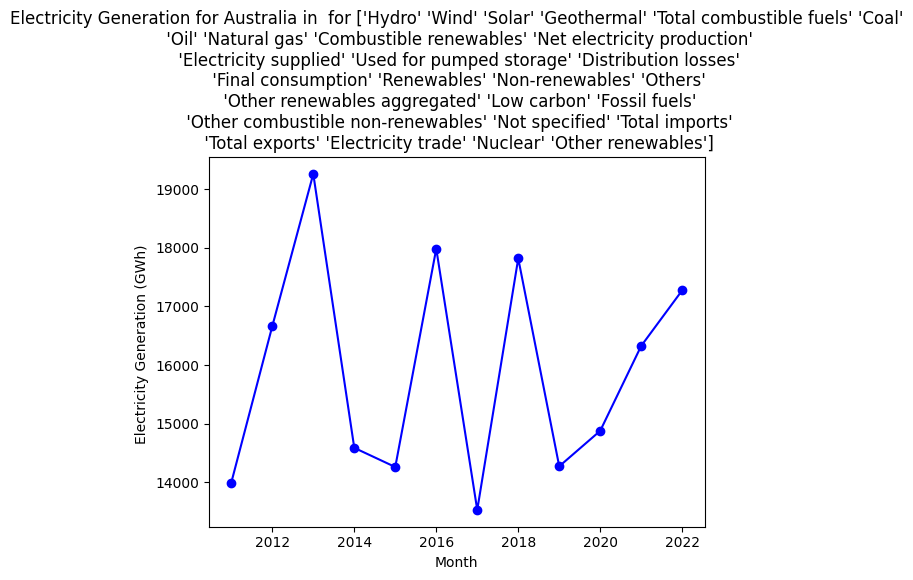

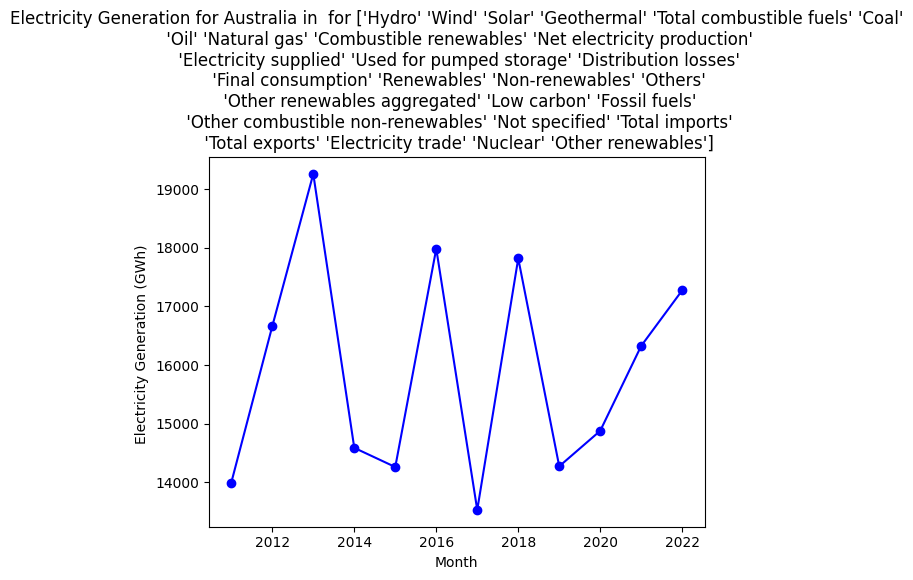

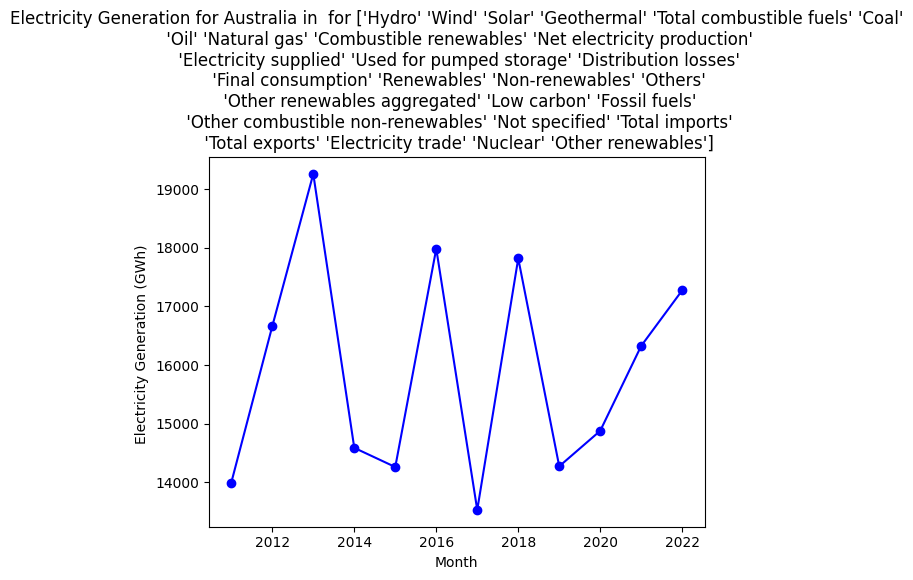

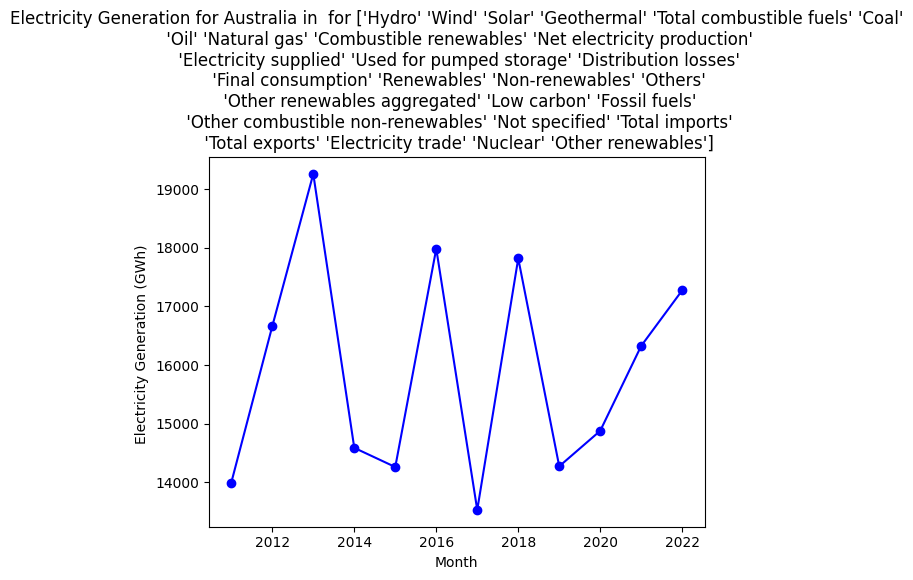

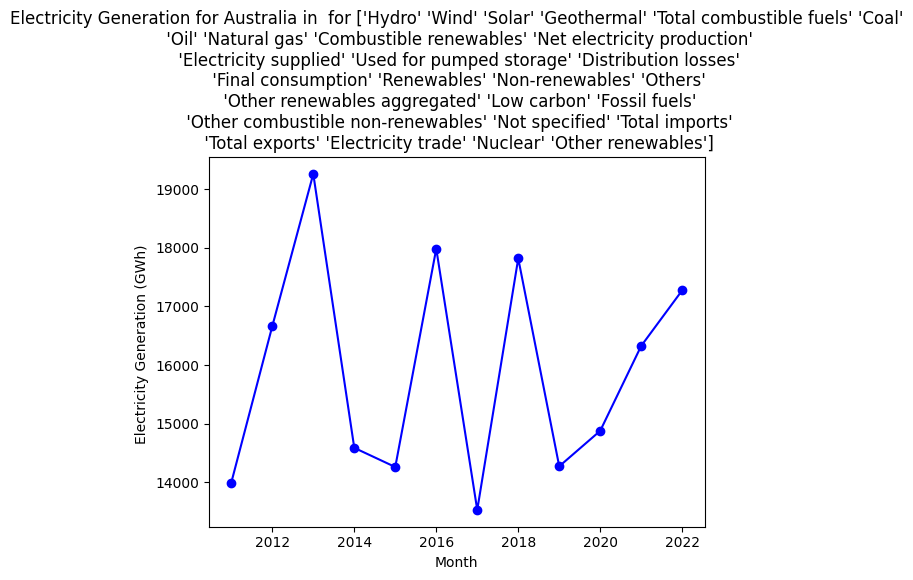

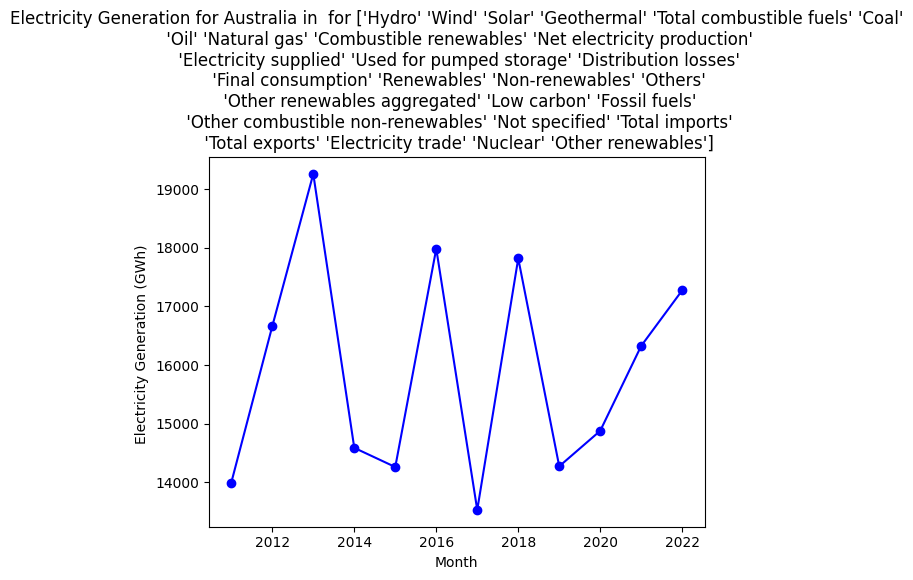

In [425]:
country_name = 'Australia'
product = 'Hydro'
mask_year = []

for x in range(2011,2023):
    filtered_data = df[(df['COUNTRY'] == country_name) & (df['YEAR'] == x) & (df['PRODUCT'] == product)]
    mask_year.append(filtered_data['VALUE'].sum())
    plt.plot(filtered_data['MONTH'], filtered_data['VALUE'], marker='o', linestyle='-', color='b')
    plt.title(f'Electricity Generation for {country_name} in {x} year  for {product}')
    plt.xlabel('Month')
    plt.ylabel('Electricity Generation (GWh) for hydro')
    #plt.grid(True)
    plt.show()

productss = df['PRODUCT'].unique()
for x in productss:
    filtered_data = df[(df['COUNTRY'] == country_name) & (df['PRODUCT'] == x)]
    plt.plot(range(2011,2023), mask_year, marker='o', linestyle='-', color='b')
    plt.title(f'Electricity Generation for {country_name} in  for {productss}')
    plt.xlabel('Month')
    plt.ylabel('Electricity Generation (GWh) ')
    plt.show()